# Multi-Spike Tempotron
An implementation of the binary tempotron in Julia. 
For further details see [Gütig, R. (2016). Spiking neurons can discover predictive features by aggregate-label learning. Science, 351(6277), aab4113.](https://science.sciencemag.org/content/351/6277/aab4113).

## Imports

In [1]:
push!(LOAD_PATH, abspath("../"))
using Tempotrons
using Tempotrons.InputGen
using Tempotrons.Plots
using Tempotrons.Optimizers
using Plots
pyplot();

## Set parameters

In [2]:
N = 10
T = 500
dt = 0.1
t = collect(0:dt:T)
ν = 3
λ = 0.1
opt = RMSprop(λ)
n_samples = 10
n_classes = 5
n_steps = 1000
tmp = Tempotron(N = N);

## Generate input samples

In [3]:
base_samples = [[PoissonSpikeTrain(ν = ν, T = T)
                 for i = 1:N]
                for j = 1:n_classes]
samples = [([SpikeJitter(s, T = T, σ = 5)
             for s ∈ base_samples[n_classes*(j - 1)÷n_samples + 1]],
            n_classes*(j - 1)÷n_samples)
           for j = 1:n_samples];

## Training

In [4]:
# Get the tempotron's output before training
out_b = [tmp(s[1], t = t) for s ∈ samples]

# Train the tempotron
@time for i = 1:n_steps
    println("Sample: ", i)
    s = rand(samples)
    Train!(tmp, s[1], s[2], optimizer = opt, T_max = T, dt = dt)
end

# Get the tempotron's output after training
out_a = [tmp(s[1], t = t) for s ∈ samples];

Sample: 1
y₀ = 2; y = 1
[0, 9223372036854775807], [0, 5.0]
[0, 9223372036854775807], [0, 2.5]
[0, 9223372036854775807], [0, 1.25]
[0, 4], [0.625, 1.25]
[0, 2], [0.9375, 1.25]
[1, 2], [0.9375, 1.09375]
[1, 2], [0.9375, 1.015625]
[1, 2], [0.9375, 0.9765625]
[1, 2], [0.95703125, 0.9765625]
[1, 2], [0.95703125, 0.966796875]
M = 1, tₘₐₓ = 258.35286369632206, Vₘₐₓ = 0.9582413668179472
vₘₐₓ(θ⃰)∈[0.9582413715705828, 0.9582413668179472], f(θ⃰)∈[-0.0012101215705827562, 0.008555508182052751]
θ⃰ = 0.9582413709894927
Sample: 2
y₀ = 4; y = 3
[0, 9223372036854775807], [0, 5.0]
[0, 9223372036854775807], [0, 2.5]
[2, 9223372036854775807], [0, 1.25]
[2, 11], [0.625, 1.25]
[2, 4], [0.9375, 1.25]
[2, 4], [0.9375, 1.09375]
[3, 4], [0.9375, 1.015625]
[3, 4], [0.9765625, 1.015625]
[3, 4], [0.9765625, 0.99609375]
[3, 4], [0.986328125, 0.99609375]
M = 2, tₘₐₓ = 130.37488709754103, Vₘₐₓ = 0.9728411361757703
vₘₐₓ(θ⃰)∈[0.9872145418726439, 0.9728411361757703], f(θ⃰)∈[-0.0008864168726439026, 0.023252613824229718]
θ

## Plots

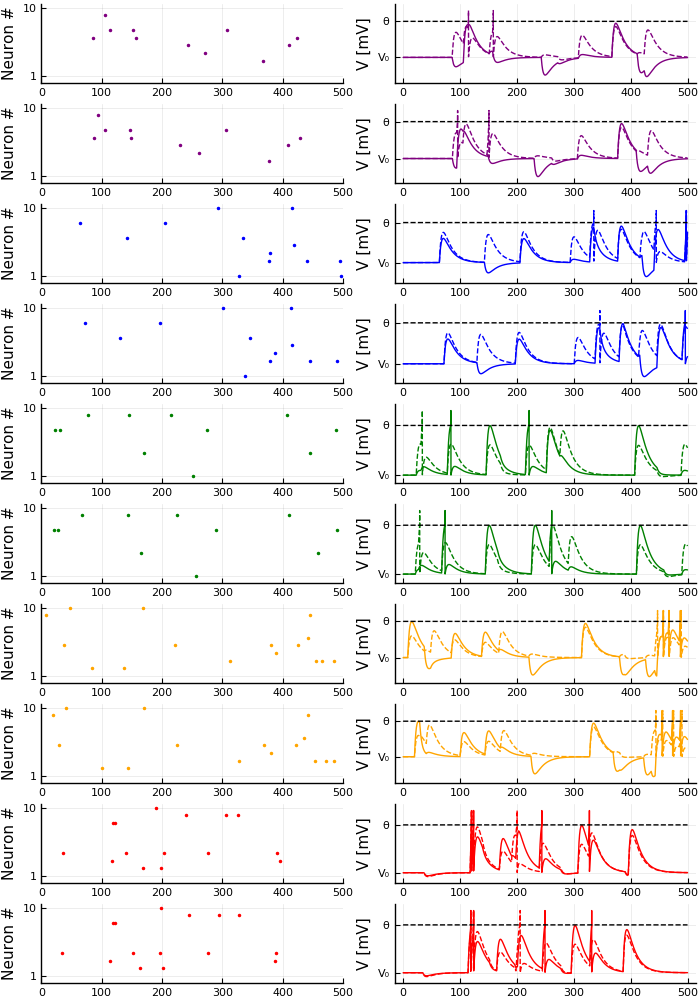

In [5]:
# Prepare to plot
pyplot(size = (700, 1000))
C(g::ColorGradient) = RGB[g[z]
    for z = range(0, stop = 1, length = n_classes)]
clibrary(:misc)
g = :rainbow
cols = cgrad(g) |> C

# Plots
inp_plots = [PlotInputs(s[1], T_max = T, color = cols[s[2] + 1])
  for s ∈ samples]
train_plots = [PlotPotential(tmp, out_b = out_b[i], out_a = out_a[i],
                             t = t, color = cols[samples[i][2] + 1])
                for i = 1:length(samples)]
ps = vcat(reshape(inp_plots, 1, :), reshape(train_plots, 1, :))
plot(ps[:]..., layout = (length(inp_plots), 2))